In [2]:
# imports
import pandas as pd

In [ ]:
# read in billboard 2018-2020 data
path = '../data/billboardSongsWeekly.csv'
billboard_df = pd.read_csv(path)
billboard_df.head()

In [ ]:
# checking for null values
billboard_df.isnull().sum()

In [ ]:
# checking to see range of instance values
billboard_df['Instance'].unique()

In [ ]:
# replacing nans with 0
billboard_df = billboard_df.fillna(0)

In [ ]:
# re-checking for null values
billboard_df.isnull().sum()

In [ ]:
# change weekid col to datetime
billboard_df["WeekID"] = pd.to_datetime(billboard_df["WeekID"])

In [ ]:
# changing unnecessary floats to integers
billboard_df = billboard_df.astype({"Instance": int, "Previous Week Position": int, "Peak Position": int, "Weeks on Chart": int})

In [ ]:
# checking data types
billboard_df.dtypes

In [ ]:
# removing data from before 2018
bb_subset = billboard_df[billboard_df['WeekID'].dt.date.astype(str) >= '2017-12-31']
bb_subset.head()

In [ ]:
# checking shape of df
bb_subset.shape

In [ ]:
# reset index
bb_subset = bb_subset.reset_index(drop=True)
bb_subset.head()

In [ ]:
# renaming cols
bb_subset.columns = ['url', 'date', 'chart_position', 'song', 'performer', 'songID', 'instance', 'previous_position', 'peak', 'weeks_on_chart']
bb_subset.head()

In [ ]:
# reordering cols
bb_subset = bb_subset[['song', 'performer', 'date', 'chart_position','previous_position', 'peak', 'weeks_on_chart', 'instance', 'songID', 'url']]
bb_subset.to_csv('billboard_subset.csv')
bb_subset.head()

In [ ]:
# path2 = '../data/tracks20102021.csv'
# tracks = pd.read_csv(path2)
# tracks.head()

In [ ]:
import os
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [ ]:
load_dotenv('.env')
CLIENT_ID = os.getenv('SPOTIFY_CLIENT_ID')
CLIENT_SECRET = os.getenv('SPOTIFY_CLIENT_SECRET')

In [ ]:
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET))

In [ ]:
# From the tracks df
song_titles = tracks[['name', 'artists']]
song_titles.loc[:, 'artists'] = song_titles['artists'].apply(lambda x: x.strip("['']"))

In [ ]:
# from the bb_subset df
song_titles_bb = bb_subset[['song', 'performer']]
song_titles_bb.loc[:, 'performer'] = song_titles_bb.loc[:, 'performer'].apply(lambda x: x.split('Featuring')[0])
song_titles_bb.loc[:, 'performer'] = song_titles_bb.loc[:, 'performer'].apply(lambda x: x.split('&')[0])
song_titles_bb

In [ ]:
# TRACKS DF
song_list = {
    'artist': [],
    'song': [],
    'uri': []
}

for index, song in song_titles.iterrows():    
#     print(song['artists'])
    try:
        results = spotify.search(q=song)['tracks']['items'][0]
        artist = results['album']['artists'][0]['name']
        if artist == song['artists']:
            song_list['artist'].append(artist)
            song_list['song'].append(results['album']['name'])
            song_list['uri'].append(results['uri'])
        else:
            pass
    except IndexError:
        print(f"no results for {song['name']} by {song['artists']}", '\n')
        pass 


# DOESNT PICK UP MIXES/ must pass an exact title --> 
#    ex: Plastic Boy's Live Another Life has an Original Mix, 12" Vocal MIix, ect

In [ ]:
df = pd.DataFrame(song_list)
df

In [ ]:
def get_song_uri(df, col_with_song_name):
    song_list = {
        'artist': [],
        'song': [],
        'uri': []
    }

    for i, row in df.iterrows():
        song = row[f'{col_with_song_name}']
    #     artist_from_df = row['performer'].lower()
        results = spotify.search(q=song, limit=5)['tracks']['items']
        for track in results:
            song_list['artist'].append(track['artists'][0]['name'])
            song_list['song'].append(track['name'])
            song_list['uri'].append(track['uri'])
            
    return song_list

In [ ]:
song_uri_df = pd.DataFrame(get_song_uri(song_titles_bb, 'song'))

In [ ]:
song_uri_df.to_csv('../ryan/data/bb_uri.csv')

In [ ]:
features = {
    'song': [],
    'artist': [],
    'features': []
}
for i, row in song_uri_df[11038:].iterrows():
    uri = row['uri']
    audio_features = spotify.audio_features(uri)[0]
    features['song'].append(row['song'])
    features['artist'].append(row['artist'])
    features['features'].append(audio_features)

In [ ]:
first_bit = features

In [ ]:
second_bit = features 

In [ ]:
third_bit = features 

In [ ]:
f = pd.DataFrame(first_bit)

In [ ]:
s = pd.DataFrame(second_bit)

In [ ]:
t = pd.DataFrame(third_bit)

In [ ]:
bb_features = pd.concat([pd.concat([f,s]), t])
bb_features = bb_features.rename(columns={'artist': 'performer'})
bb_features.to_csv('../ryan/data/bb_features.csv')
bb_features

In [ ]:
feats = bb_features['features'].apply(pd.Series)

In [ ]:
bb_features_df = pd.concat([bb_features, feats], axis=1).drop('features', axis=1)

In [ ]:
bb_features_df.to_csv('../ryan/data/bb_features.csv')

In [ ]:
# tracks_uri_1 = pd.DataFrame(get_song_uri(tracks[:5000], 'name'))

In [ ]:
bb_features_df.head()

In [ ]:
song_uri_df = song_uri_df.rename(columns={'artist': 'performer'})

In [ ]:
song_uri_df

In [ ]:
bb_subset['hitTF'] = 1

In [ ]:
hits = bb_subset[['song', 'performer', 'hitTF']].rename(columns={'song': 'song_x'})

In [ ]:
bb_final = bb_final.merge(hits, on=['song_x', 'performer'], how='left').drop_duplicates(['song_x', 'performer'], keep='first')
bb_Final = bb_final.fillna(0).iloc[:, 0:23]

In [ ]:
# change in position
human_features = bb_subset[['song', 'performer', 'chart_position', 'previous_position', 'weeks_on_chart', 'peak']]

In [ ]:
human_features = human_features.rename(columns={'song': 'song_x'})

In [ ]:
bb_Final = bb_Final.merge(human_features, on=['song_x', 'performer'], how='left').fillna(-1)

In [ ]:
BB_Final = bb_Final.drop_duplicates(['song_x', 'performer'], keep='first')

In [ ]:
BB_Final.to_csv('../ryan/data/BB_FINAL.CSV')

In [12]:
# BB_Final = pd.read_csv('../ryan/data/BB_FINAL.CSV')
BB_Final = pd.read_csv('../../data/BB_FINAL.CSV')
BB_Final = BB_Final.drop('hitTF_x.1', axis=1)

In [13]:
bb_feature_num = BB_Final.select_dtypes(['int', 'float'])

In [14]:
bb_feature_num
# how long has song been on chart
#     consecutive week count? 
#
# add more features --> something a human use and infer from

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,weeks_on_chart_x,peak_x,chart_position_y,previous_position_y,weeks_on_chart_y,peak_y,chart_position,previous_position,weeks_on_chart,peak
0,0.824,0.588,6.0,-6.400,0.0,0.0924,0.69200,0.000104,0.1490,0.513,...,8.0,11.0,11.0,19.0,8.0,11.0,11.0,19.0,8.0,11.0
46656,0.794,0.679,6.0,-5.395,0.0,0.1040,0.16600,0.000002,0.1340,0.547,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46657,0.664,0.212,6.0,-7.762,0.0,0.0460,0.93100,0.000000,0.1020,0.574,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46658,0.535,0.948,6.0,-4.190,0.0,0.0356,0.00225,0.000000,0.3760,0.778,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46659,0.732,0.678,2.0,-4.977,1.0,0.0886,0.08670,0.000024,0.1120,0.196,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684977,0.391,0.608,7.0,-10.714,1.0,0.2990,0.19000,0.000000,0.1880,0.420,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3684978,0.228,0.125,8.0,-17.576,1.0,0.0369,0.90700,0.000425,0.1710,0.216,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3684979,0.754,0.424,2.0,-8.463,1.0,0.0363,0.64300,0.000000,0.0652,0.806,...,21.0,33.0,33.0,0.0,21.0,33.0,33.0,0.0,21.0,33.0
3687723,0.666,0.841,2.0,-3.592,1.0,0.0312,0.61300,0.000000,0.1130,0.840,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
(bb_feature_num.hitTF_x == 1.0).sum()

507

In [43]:
import time
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
def LogRegModel(X, y, size=None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=size + 0.05)
    
    X_scaler = MinMaxScaler().fit(X_train)

    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)
    X_val_scaled = X_scaler.transform(X_val)
    
    LogReg = LogisticRegression()
    
    t = time.time()
    LogReg.fit(X_train_scaled, y_train)
    elapsed_time = time.time() - t
    
    print(f"Training Data Score: {LogReg.score(X_train_scaled, y_train)}")
    print(f"Testing Data Score: {LogReg.score(X_test_scaled, y_test)}", '\n')
    
    predictions = LogReg.predict(X_val_scaled)
    
    print(classification_report(y_val, predictions, target_names=['not hit','hit']), '\n')
    
    pickle.dump(LogReg, open('../../models/LogReg.sav', 'wb'))
    return LogReg.score(X_train_scaled, y_train), LogReg.score(X_test_scaled, y_test)

In [54]:
X = bb_feature_num.loc[:, bb_feature_num.columns != 'hitTF_x'].values
y = bb_feature_num['hitTF_x'].values

In [55]:
LogRegModel(X, y, size=0.2);

Training Data Score: 0.9871844660194175
Testing Data Score: 0.9941792782305006 

              precision    recall  f1-score   support

     not hit       0.99      1.00      0.99       752
         hit       1.00      0.93      0.96       107

    accuracy                           0.99       859
   macro avg       0.99      0.96      0.98       859
weighted avg       0.99      0.99      0.99       859
 



In [20]:
test_size = [x / 10 for x in range(1,10)]

In [21]:
scores = {
    'test_size': [],
    'train_score': [],
    'test_score': []
}

for size in test_size:
    print(f'{size * 100}% of data is test --> {(1 - size) * 100}% is training')
    train_score, test_score = LogRegModel(X, y, size)
    scores['test_size'].append(size)
    scores['train_score'].append(train_score)
    scores['test_score'].append(test_score)

10.0% of data is test --> 90.0% is training
Training Data Score: 0.9890344197380445
Testing Data Score: 0.9953488372093023 

              precision    recall  f1-score   support

     not hit       0.99      1.00      1.00       517
         hit       1.00      0.95      0.98        63

    accuracy                           0.99       580
   macro avg       1.00      0.98      0.99       580
weighted avg       0.99      0.99      0.99       580
 

20.0% of data is test --> 80.0% is training
Training Data Score: 0.9883495145631068
Testing Data Score: 0.9883585564610011 

              precision    recall  f1-score   support

     not hit       0.98      1.00      0.99       772
         hit       1.00      0.86      0.93        87

    accuracy                           0.99       859
   macro avg       0.99      0.93      0.96       859
weighted avg       0.99      0.99      0.99       859
 

30.0% of data is test --> 70.0% is training
Training Data Score: 0.985663082437276
Testing D

In [22]:
score_df = pd.DataFrame(scores)

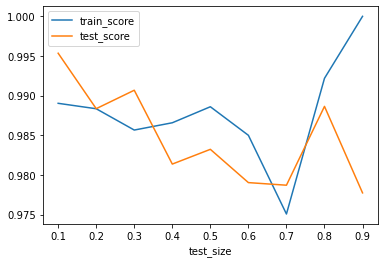

In [23]:
score_df.plot.line(x='test_size');

In [ ]:
# X = bb_feature_num.loc[:, bb_feature_num.columns != 'hitTF_x'].values
# y = bb_feature_num['hitTF_x'].values

In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2)

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

In [ ]:
# # Scale your data
# from sklearn.preprocessing import MinMaxScaler

# X_scaler = MinMaxScaler().fit(X_train)

# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)
# X_val_scaled = X_scaler.transform(X_val)

In [ ]:
# from sklearn.linear_model import LogisticRegression
# LogReg = LogisticRegression()

In [ ]:
# import time

In [ ]:
# t = time.time()
# LogReg.fit(X_train_scaled, y_train)
# time.time() - t

In [ ]:
# print(f"Training Data Score: {LogReg.score(X_train_scaled, y_train)}")
# print(f"Testing Data Score: {LogReg.score(X_test_scaled, y_test)}")

In [ ]:
# predictions = LogReg.predict(X_val_scaled)
# for i, pred in enumerate(predictions):
#     print("Classes are either 0 (not hit) or 1 (is hit)")
#     print(f"The new point was classified as: {pred}")
#     print(f'actual: {y_val[i]}', '\n')

In [ ]:
# from sklearn.metrics import classification_report

# print(classification_report(y_val, predictions, target_names=['not hit','hit']))

In [24]:
X = bb_feature_num.loc[:, bb_feature_num.columns != 'hitTF_x'].values
y = bb_feature_num['hitTF_x'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

# Scale your data
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_val_scaled = X_scaler.transform(X_val)

In [25]:
from sklearn.svm import SVC 
SVM = SVC(kernel='linear')
SVM.fit(X_train_scaled, y_train);

In [26]:
svm_predictions = SVM.predict(X_test_scaled)

In [27]:
print(classification_report(y_test, svm_predictions, target_names=['not hit','hit']))

              precision    recall  f1-score   support

     not hit       0.99      1.00      1.00      3029
         hit       1.00      0.96      0.98       406

    accuracy                           1.00      3435
   macro avg       1.00      0.98      0.99      3435
weighted avg       1.00      1.00      1.00      3435



In [32]:
confusion_matrix(y_test, svm_predictions)

array([[3029,    0],
       [  16,  390]])

In [33]:
svm_predictions = SVM.predict(X_val_scaled)
print(classification_report(y_val, svm_predictions, target_names=['not hit','hit']))

              precision    recall  f1-score   support

     not hit       0.99      1.00      1.00       195
         hit       1.00      0.95      0.97        20

    accuracy                           1.00       215
   macro avg       1.00      0.97      0.99       215
weighted avg       1.00      1.00      1.00       215



In [34]:
confusion_matrix(y_val, svm_predictions)

array([[195,   0],
       [  1,  19]])

In [58]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

reduced_X = pca.transform(X)

In [71]:
y = bb_feature_num['hitTF_x'].values

X_train, X_test, y_train, y_test = train_test_split(reduced_X, y, train_size=0.2)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

# Scale your data
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_val_scaled = X_scaler.transform(X_val)

SVM = SVC(kernel='linear')
SVM.fit(X_train_scaled, y_train)

svm_predictions = SVM.predict(X_test_scaled)
print(classification_report(y_test, svm_predictions, target_names=['not hit','hit']))

confusion_matrix(y_test, svm_predictions)

              precision    recall  f1-score   support

     not hit       0.98      1.00      0.99      3041
         hit       1.00      0.85      0.92       394

    accuracy                           0.98      3435
   macro avg       0.99      0.92      0.95      3435
weighted avg       0.98      0.98      0.98      3435



array([[3041,    0],
       [  61,  333]])

Number of support vectors: 47


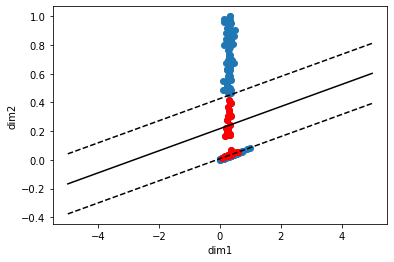

In [78]:
import numpy as np
# get the separating hyperplane
w = SVM.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (SVM.intercept_[0]) / w[1]

margin = 1 / np.sqrt(np.sum(SVM.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

plt.clf()
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

support_vectors = SVM.support_vectors_
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
# plt.title('Linearly separable data with support vectors')
plt.xlabel('dim1')
plt.ylabel('dim2')

plt.axis('tight')

print(f'Number of support vectors: {len(support_vectors)}')

In [56]:
pickle.dump(SVM, open('../../models/SVM.sav', 'wb'))

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rf = RandomForestClassifier(n_estimators=200)

In [37]:
rf.fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)

0.9991266375545852

In [38]:
importances = rf.feature_importances_
importances

array([1.27314865e-03, 1.60208404e-04, 2.48096493e-04, 2.83660671e-04,
       0.00000000e+00, 1.04611203e-03, 3.71297100e-04, 2.50704771e-04,
       6.43721782e-04, 5.08763698e-04, 5.48401483e-04, 3.21304233e-04,
       1.09922133e-05, 2.01832056e-01, 4.58607105e-03, 6.49505129e-02,
       7.56467565e-02, 2.13409888e-01, 5.25652599e-04, 7.05835819e-02,
       6.58760045e-02, 1.83755916e-01, 1.50524363e-03, 4.07520388e-02,
       7.09098664e-02])

In [39]:
feature_cols = bb_feature_num.loc[:, bb_feature_num.columns != 'hitTF_x'].columns

In [40]:
feature_impt = {
    'feats':feature_cols,
    'importance': importances
}

In [41]:
import matplotlib.pyplot as plt

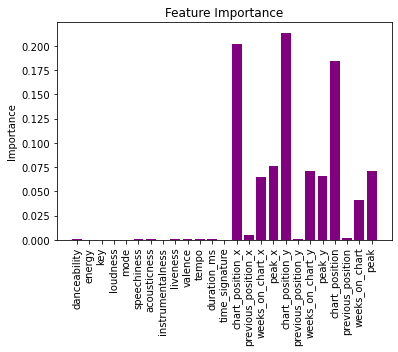

In [42]:
plt.bar(x=feature_impt['feats'], height=feature_impt['importance'], color='purple')
plt.xticks(rotation=90)
plt.title('Feature Importance')
plt.ylabel('Importance');
# plt.savefig('../ryan/data/feature_importance.png', dpi=400, bbox_inches='tight');

In [57]:
pickle.dump(rf, open('../../models/rf.sav', 'wb'))